# Анализ продаж видеоигр для планирования рекламной компании

## Оглавление
<a id = "index"></a>

1. [Задание](#task)
1. [Описание данных](#data_description)
1. [Настройка окружения](#env)
1. [Загрузка и первичное изучение данных](#first_look)
1. [Подготовка данных](#etl)
1. [Исследовательский анализ данных](#eda)
1. [Проверка гипотез](#main_hypotheses)
1. [Выводы и рекомендации](#conclusion)

## Задание
<a id = "task"></a>
[В оглавление](#index)

__Описание проекта__  
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Доступны данные до 2016 года. Данные за 2016 год могут быть неполными.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board). ESRB — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  
Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

__Задание__  
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных
<a id = "data_description"></a>
[В оглавление](#index)

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

## Настройка окружения
<a id = "env"></a>
[В оглавление](#index)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
sns.set(style="whitegrid")

import warnings


import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# отключение предупреждений Anaconda
warnings.simplefilter('ignore')


from pylab import rcParams

# размер графиков по умолчанию
rcParams['figure.figsize'] = 20, 10

title_font = {'size':'16', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'14', 'weight':'bold'}


# отображение одного знака после запятой
pd.options.display.float_format = '{:,.1f}'.format

## Загрузка и первичное изучение данных
<a id = "first_look"></a>
[В оглавление](#index)

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5557,NCAA Basketball 10,X360,"2,009.0",Sports,0.3,0.0,0.0,0.0,75.0,tbd,E
14974,The Great Battle Gaiden 2: Matsuri da Wasshoi,SNES,"1,994.0",Action,0.0,0.0,0.0,0.0,nan,NaN,NaN
3559,The Lord of the Rings: The Return of the King,GBA,"2,003.0",Action,0.4,0.1,0.0,0.0,77.0,8.2,T
15533,Battle Princess of Arcadias,PS3,"2,013.0",Role-Playing,0.0,0.0,0.0,0.0,69.0,7.9,T
11939,Aqua Teen Hunger Force: Zombie Ninja Pro-Am,PS2,"2,007.0",Racing,0.0,0.0,0.0,0.0,37.0,5.9,M
9273,NCIS,X360,"2,011.0",Adventure,0.1,0.0,0.0,0.0,35.0,4.7,T
3797,Oni,PS2,"2,001.0",Action,0.3,0.2,0.0,0.1,69.0,7.8,T
10251,Lost in Blue,DS,"2,005.0",Adventure,0.1,0.0,0.0,0.0,69.0,7.8,E10+
7346,Tenchu: Return From Darkness,XB,"2,004.0",Action,0.2,0.1,0.0,0.0,70.0,7,M
171,Uncharted 4: A Thief's End,PS4,"2,016.0",Shooter,1.9,2.5,0.2,0.8,93.0,7.9,T


### Промежуточный вывод
- Названия столбцов содержат прописные символы. Их необходимо перевести в строчный вид.
- Датафрейм содержит пропуски. Детальный анализ причин возникновения и обработка пропусков выполнены на этапе __Подготовка данных__.
- Данные в столбцах с годом выпуска игры и оценками критиков необходимо привести в целочисленный вид. Типы данные в других столбцах соответствуют логике столбцов.

## Подготовка данных
<a id = "etl"></a>
[В оглавление](#index)

### Приведение названий столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

### Преобразование типов данных

In [6]:
# год выпуска игры
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())

# оценка критиков
df['critic_score'] = df['critic_score'].astype(pd.Int64Dtype())

### Расчет суммарных продаж

In [7]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Проверка продаж за 2016 год

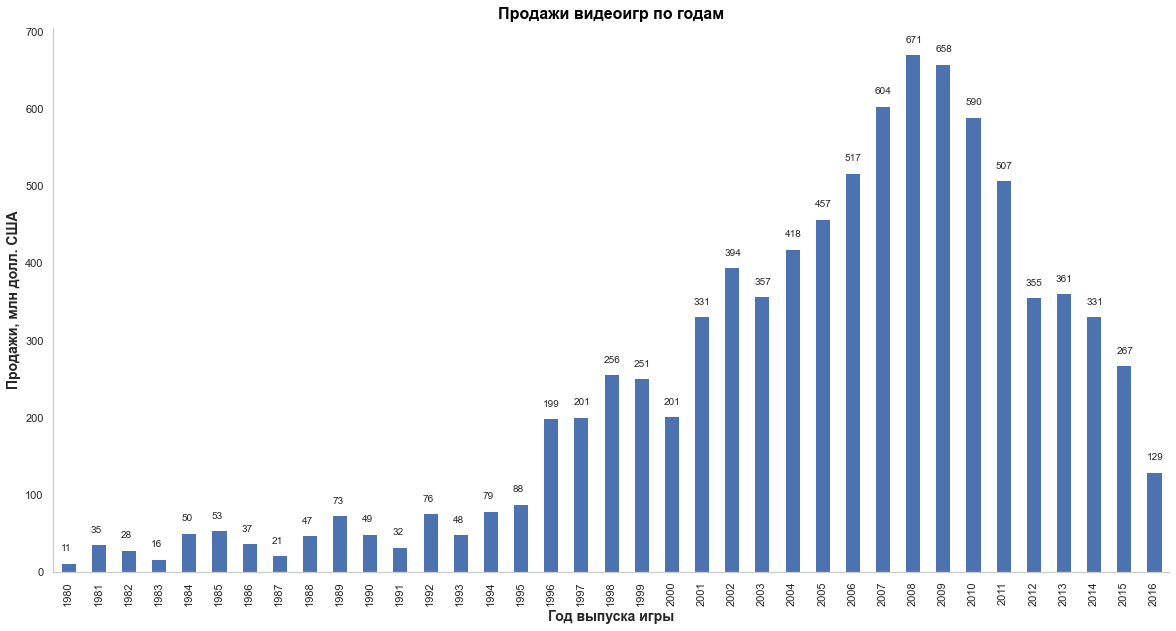

In [8]:
# продажи игр по годам
ax = df.groupby(by='year_of_release')['total_sales'].sum().plot.bar()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x(), p.get_height() + 15), 
                rotation=0
               )
plt.title('Продажи видеоигр по годам', **title_font)
plt.xlabel('Год выпуска игры', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)
sns.despine()
plt.grid()
plt.show()

Продажи видеоигр в 2016 году заметно ниже предыдущих лет потому, что не достигли своего максимума. Информация в задании о неполных данных за 2016 год — верна. __Необходимо исключить данные за 2016 год.__

In [9]:
# исключение видеоигр, выпущенных в 2016 году
df = df.loc[df.year_of_release < 2016]

### Проверка пропусков

In [10]:
for i in df.loc[:, df.isnull().any()].columns:
    print('По столбцу "{}" пропущено {} знач.'.format(i, df[i].isnull().sum()))

По столбцу "name" пропущено 2 знач.
По столбцу "genre" пропущено 2 знач.
По столбцу "critic_score" пропущено 8193 знач.
По столбцу "user_score" пропущено 6401 знач.
По столбцу "rating" пропущено 6456 знач.


#### Обработка пропусков в столбцах __name__ и __genre__

In [11]:
df[(df.name.isnull()) | (df.genre.isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.8,0.5,0.0,0.1,<NA>,NaN,NaN,2.4
14244,NaN,GEN,1993,NaN,0.0,0.0,0.0,0.0,<NA>,NaN,NaN,0.0


Пропуски в столбцах __name__ и __genre__ приходятся на одинаковые записи. Название видеоигры не используется, но жанр важен для анализа и его нельзя восстановить. __Целесообразно удалить записи о видеоиграх без жанра.__

In [12]:
df = df[df.genre.notnull()]

#### Обработка пропусков в столбцах __critic_score__, __user_score__, __rating__

In [13]:
# столбцы для автоматической проверки
columns_to_check = (('critic_score', 'Без оценки критиков'),
                   ('user_score', 'Без оценки пользователей'),
                   ('rating', 'Без рейтинга ESRB'))

In [14]:
# анализ пропусков в столбцах
for column in columns_to_check:
    print('Столбец:', column[0])
    print()
    print(df[column[0]].value_counts(ascending=True, dropna=False))
    print()
    print('_____')
    print()

Столбец: critic_score

21        1
13        1
17        1
20        3
29        3
       ... 
80      229
75      234
71      240
70      248
NaN    8191
Name: critic_score, Length: 82, dtype: Int64

_____

Столбец: user_score

0         1
0.2       1
2.3       1
9.7       1
0.7       1
       ... 
8       269
8.2     269
7.8     311
tbd    2342
NaN    6399
Name: user_score, Length: 97, dtype: int64

_____

Столбец: rating

RP         1
AO         1
K-A        3
EC         8
E10+    1343
M       1458
T       2819
E       3855
NaN     6454
Name: rating, dtype: int64

_____



In [15]:
# при анализе случайно наткнулся на эту запись и решил проверить
df[(df['platform'] == "DS") & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.0,0.0,<NA>,NaN,NaN,0.0


- Аббревиатура __tbd__ означает "рейтинг к определению" (от англ. to be determined). Такое возможно если игра еще не выпущена и не получила оценок пользователей. Отметка лишает возможности выполнять операции стат. анализа над столбцом.  
__Необходимо удаление значений tbd.__
- Рейтинг __K-A__ означает "Kids to Adults" и в 1998 году был переименован в __E__ — "Everyone" (<a href="https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board">Источник</a>).  
__В датафрейме рейтинг K-A будет заменен на E.__
- На платформе DS есть игра с релизом в 1985 году, хотя тогда платформа еще не существовала.  
__Год релиза этой игры необходимо изменить на 2007 для корректного отображения графиков.__

In [16]:
# удаление значений tbd
df.user_score = df.user_score.replace('tbd',np.nan)

In [17]:
# год выпуска игры
#df.user_score = df.user_score.astype('int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [18]:
# замена рейтинга K-A на E
df.loc[df.rating == 'K-A', 'rating'] = 'E'

In [19]:
df.loc[df.query('platform == "DS" and year_of_release == 1985').index, ('year_of_release')] = 2007

ValueError: unknown type object

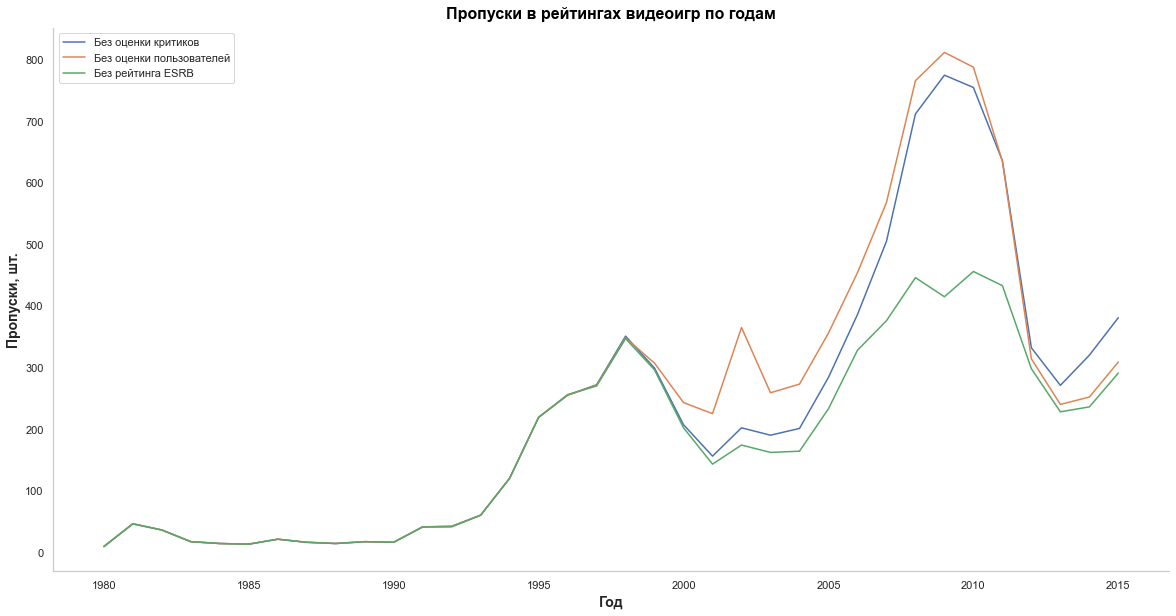

In [20]:
# распределение пропусков рейтингов по годам 
for column in columns_to_check:
    (df[df[column[0]].isnull()].
     groupby(by='year_of_release')['name'].count().
     plot(label=(column[1]))
    )
    
#(df.query('user_score == "tbd"').
# groupby(by='year_of_release')['total_sales'].count().
# plot(label='С оценкой пользователей tbd')
#)

plt.title('Пропуски в рейтингах видеоигр по годам', **title_font)
plt.legend(
#    title='Рейтинг', 
    loc='upper left')
plt.xlabel('Год', **axis_font)
plt.ylabel('Пропуски, шт.', **axis_font)
sns.despine()
plt.grid(False)
plt.show()

Пропуски в столбцах __critic_score__, __user_score__, __rating__:   
- Все три тренда количества пропусков в рейтингах совпадают до начала 2000-х годов. 
- Между 1995 и 2000 годами наблюдается пик пропусков. Организация ESRB начала выдавать рейтинги в 1994 году в США и Канаде. Не все игры выходили на рынке Северной Америки и поэтому остались без рейтинга.
- После 2001 года растет количество игр без оценки критиков, но тренды оценки пользователей и рейтинга ESRB остаются почти одинаковыми.
- В 2009 году наблюдается еще один пик в количестве пропусков. У тренда оценки критиков он в два раза выше, чем у остальных рейтингов. Вероятно это связано с выпуском большого количества инди или малобюджетных игр независимыми разработчиками, которые не направляются на оценку.   
- Заполнение пропусков:
    - расчетными величинами лишено логики и исказит результаты анализа — не подходит,
    - отметкой __nr__ (от англ. not rated) лишит возможности выполнять математические операции над столбцом — не подходит,
    - отметкой __-999__ добавит лишние операции при формировании срезов на этапе анализа — не подходит.   
__Принято решение оставить пропуски "как есть".__

### Промежуточный вывод
- Исключены видеоигры, выпущенные в 2016 году, потому что их продажи не достигли своего максимума и могут исказить аналитику.
- Удалены 2 записи о видеоиграх без указания жанра.
- В датафрейме рейтинг ESRB __K-A__ заменен на __E__, с учетом соответствующего переименования в 1998 году.
- Аббревиатура __tbd__ в столбце __user_score__ означает "рейтинг к определению". Заменена на пустые значения для возможности выполнения статистический операций.
- Пропуски по столбцам __critic_score__, __user_score__ и __rating__ оставлены "как есть".

## Исследовательский анализ данных
<a id = "eda"></a>
[В оглавление](#index)

### Распределение выпуска игр по годам

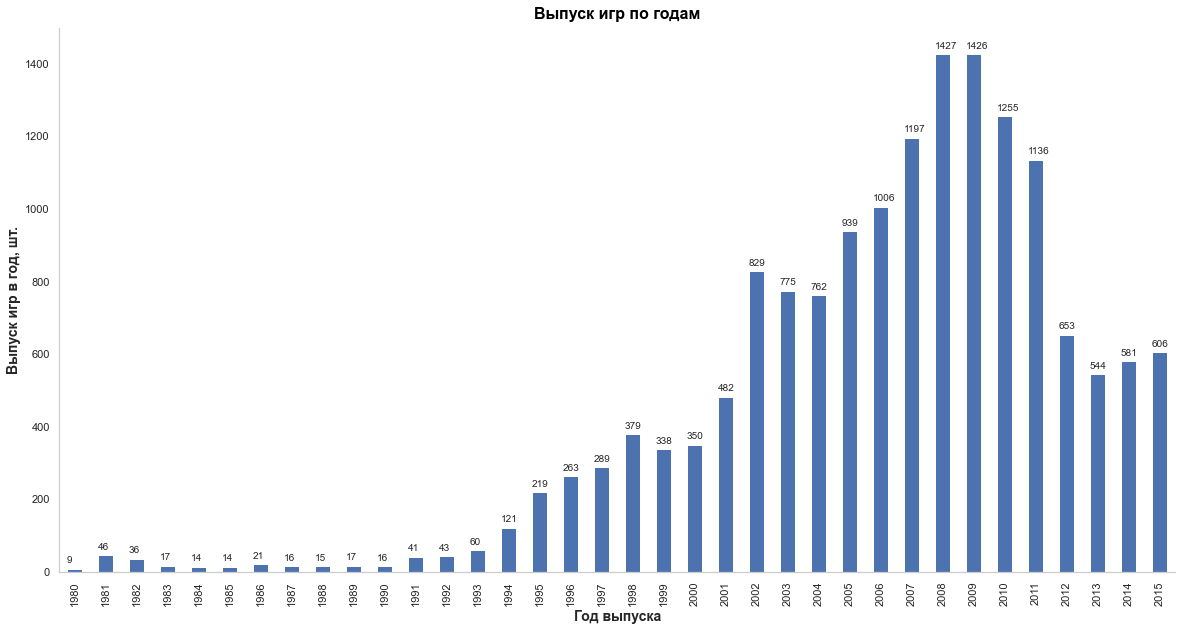

In [21]:
# выпуск игр по годам
ax = df.groupby(by='year_of_release')['platform'].count().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() * 1, p.get_height() + 15), 
                rotation=0,
               )
plt.title('Выпуск игр по годам', **title_font)
plt.xlabel('Год выпуска',**axis_font)
plt.ylabel('Выпуск игр в год, шт.',**axis_font)
sns.despine()
plt.grid(False)
plt.show()

In [22]:
# определение наиболее ранних релизов по каждой платформе
pd.pivot_table(df, 
               index='platform', 
               values='year_of_release', 
               aggfunc='min'
              ).sort_values(by=['year_of_release'], ascending=True)

,year_of_release
platform,
2600,1980
NES,1983
DS,1985
PC,1985
GB,1988
SNES,1990
GEN,1990
GG,1992
SCD,1993


In [23]:
# среднегодовой выпуск игр с 2012 года
int(df[df['year_of_release'] >= 2012].groupby(by='year_of_release')['platform'].count().mean())

596

- С 1991 года выпуск видеоигр начал расти из-за распространения доступных игровых консолей и презентацией культовой SNES — 
<a href="https://en.wikipedia.org/wiki/Super_Nintendo_Entertainment_System">Super Nintendo Entertainment System</a>.   
- В 2002 году выпуск игр резко вырос в 1,7 раза из-за роста популярности консоли PS2 — 
<a href="https://en.wikipedia.org/wiki/PlayStation_2">PlayStation 2</a>.   
- В 2011-2012 годах выпуск игр упал в 2 раза до 550 шт./год, вероятно, из-за прекращения выпуска популярной консоли PS2.   
- С 2012 года рост выпуска игр однородный и к 2015 году достиг около 600 игр в год.   
__Для планирования рекламной кампании на 2017 год нужно анализировать данные с 2012 года.__

### Распределение продаж игр по годам

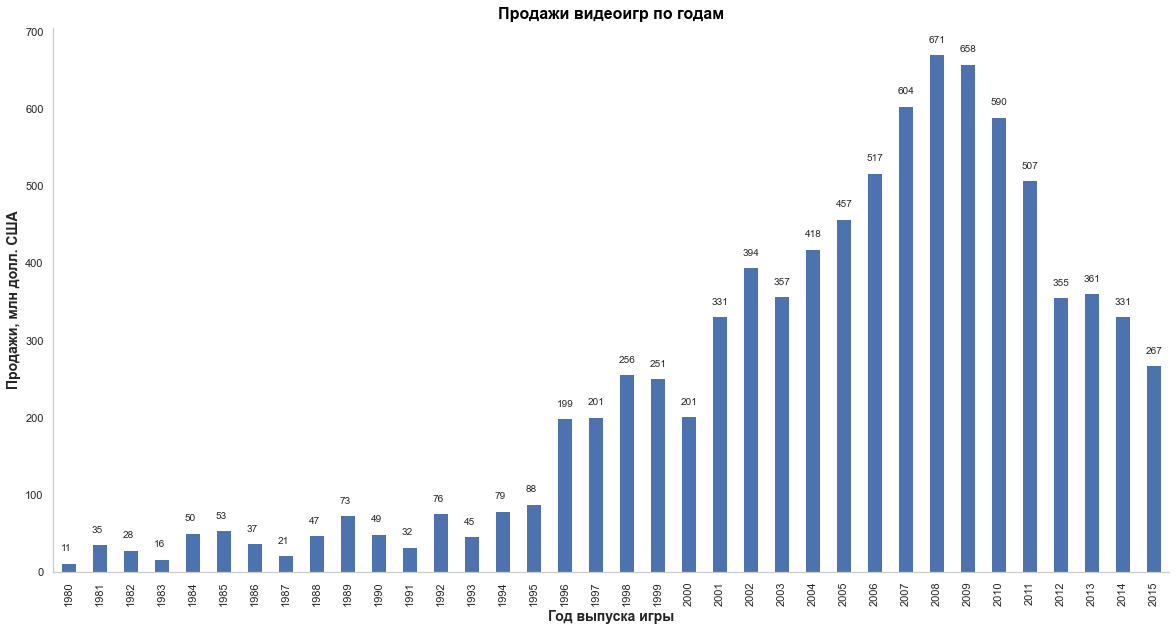

In [24]:
# продажи игр по годам
ax = df.groupby(by='year_of_release')['total_sales'].sum().plot.bar()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x(), p.get_height() + 15), 
                rotation=0
               )
plt.title('Продажи видеоигр по годам', **title_font)
plt.xlabel('Год выпуска игры',**axis_font)
plt.ylabel('Продажи, млн долл. США',**axis_font)
sns.despine()
plt.grid(False)
plt.show()

In [25]:
# среднегодовые продажи игр с 2012 года
int(df[df['year_of_release'] >= 2012].groupby(by='year_of_release')['total_sales'].sum().mean())

329

- В 2012 году продажи игр упали в 1,4 раза до 355 млн долл. США/год, вероятно, из-за прекращения выпуска популярной консоли PS2. 
- После 2012 года продажи игр колебались, но не превышали 370 млн долл. США. Среднегодовые продажи — 330 млн долл. США.   
__Для планирования рекламной кампании на 2017 год нужно анализировать данные с 2012 года.__

### Определение периода активных продаж на платформе

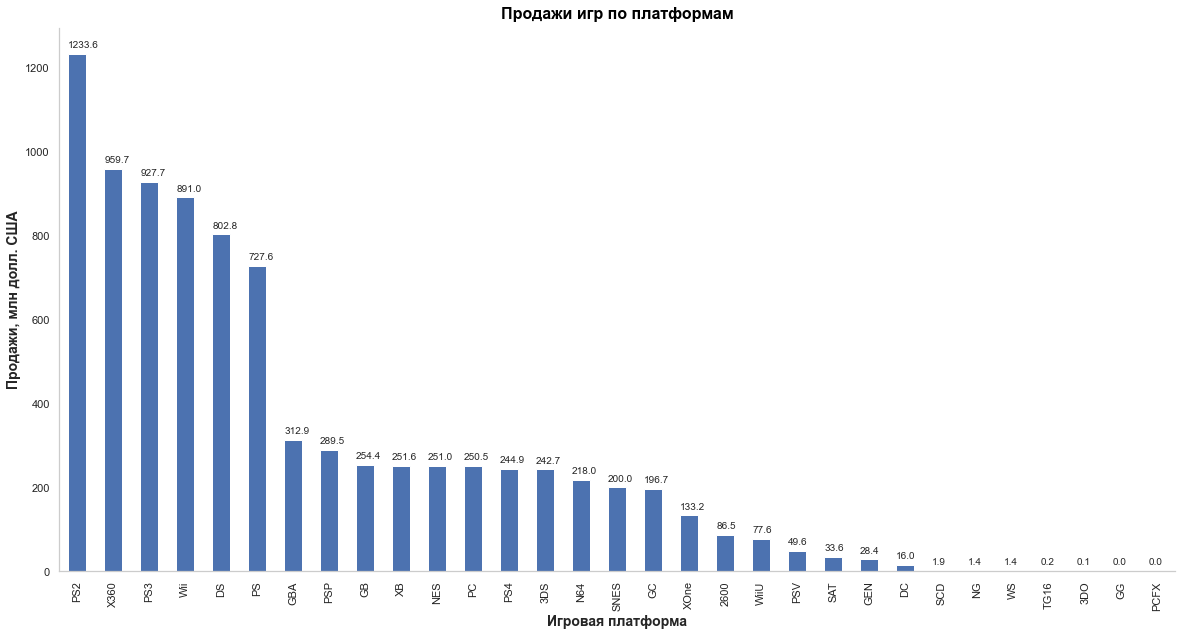

In [26]:
# продажи по платформам
ax = df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)),
                (p.get_x() * 1, p.get_height() + 15), 
                rotation=0
               )
plt.title('Продажи игр по платформам',**title_font)
plt.xlabel('Игровая платформа', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)
sns.despine()
plt.grid(False)
plt.show()

Для анализа характерного срока жизни игровых платформ выбраны 6 наиболее популярных, на которые приходится более половины глобальных продаж за все время.

In [27]:
# выбор количества топ-платформ по продажам
n = 6
top_platforms = df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).head(n).index.tolist()

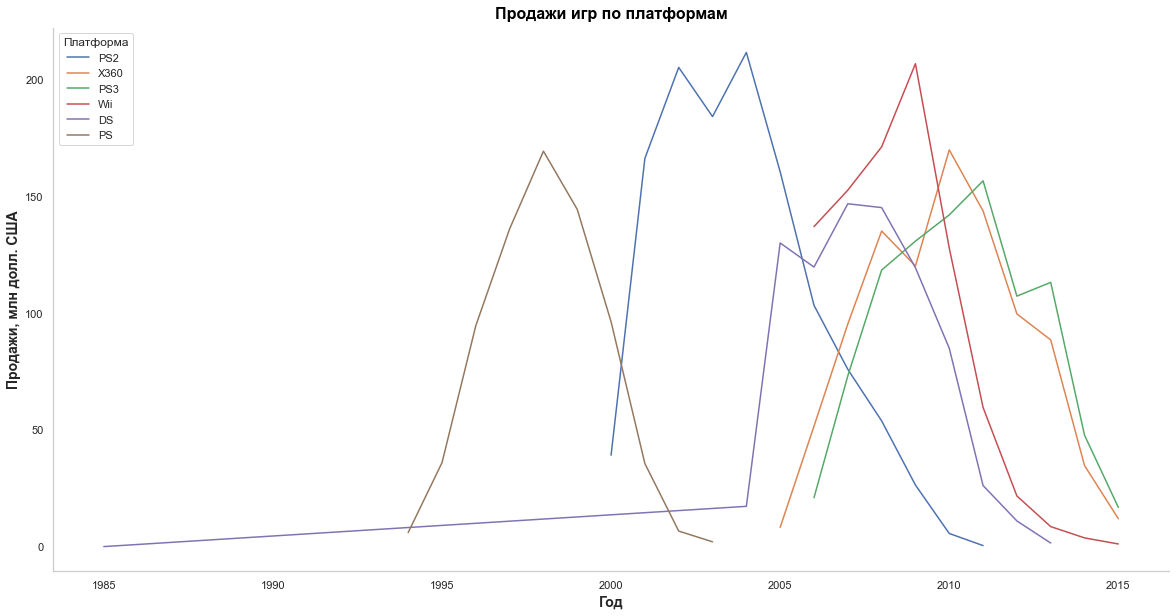

In [28]:
# построение распределения продаж на топ-платформах по годам 
for platform in top_platforms:
    df.query('platform == @platform').groupby(by='year_of_release')['total_sales'].sum().plot(label=(platform))   
plt.title('Продажи игр по платформам', **title_font)
plt.legend(title='Платформа', loc='upper left')
plt.xlabel('Год', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)
plt.locator_params(integer=True)
sns.despine()
plt.grid(False)
plt.show()

In [29]:
# расчет характерного срока жизни игровых платформ
top_platforms_years = df.query('platform in @top_platforms').pivot_table(
    index='platform', 
    columns='year_of_release',
    values='total_sales', 
    aggfunc='sum', fill_value = 0
)

# характерный срок жизни игровых платформ
top_platforms_years.gt(0).sum(axis=1)

platform
DS      11
PS      10
PS2     12
PS3     10
Wii     10
X360    11
dtype: int64

In [30]:
print('Характерный срок активных продаж на игровых платформах — {} лет.'.format(
    int(top_platforms_years.gt(0).sum(axis=1).mean())))

Характерный срок активных продаж на игровых платформах — 10 лет.


__Для планирования рекламной кампании на 2017 год нужно учитывать, что средний период активных продаж на игровой платформе — 10 лет.__

### Выбор перспективных игровых платформ

In [31]:
# создание датафрейма с данным после 2012 года
df_actual = df.loc[df.year_of_release >= 2012]

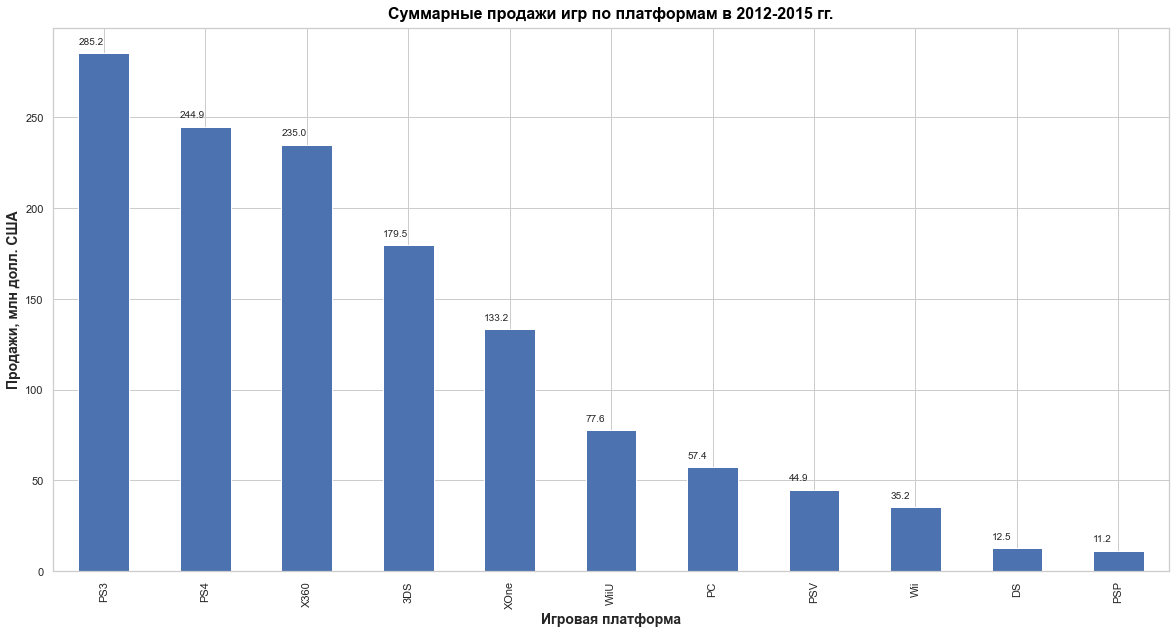

In [32]:
# продажи по платформам
ax = df_actual.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),1)),
                (p.get_x() * 1, p.get_height() + 5), 
                rotation=0
               )
plt.title('Суммарные продажи игр по платформам в 2012-2015 гг.', **title_font)
plt.xlabel('Игровая платформа', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)

plt.show()

- Платформа PS3 лидирует по суммарным продажам за 2012-2015 года — 285 млн долл. США.
- Платформы PS4 и X360 на втором и третьем месте по суммарным продажам — 245 и 235 млн долл. США соответственно. 
- Интересно, что платформа XOne выпущена одновременно с PS4, но принесла всего 133 млн долл. США за 2012-2015 годы и пока не обогнола компактную консоль 3DS со 180 млн долл. США.

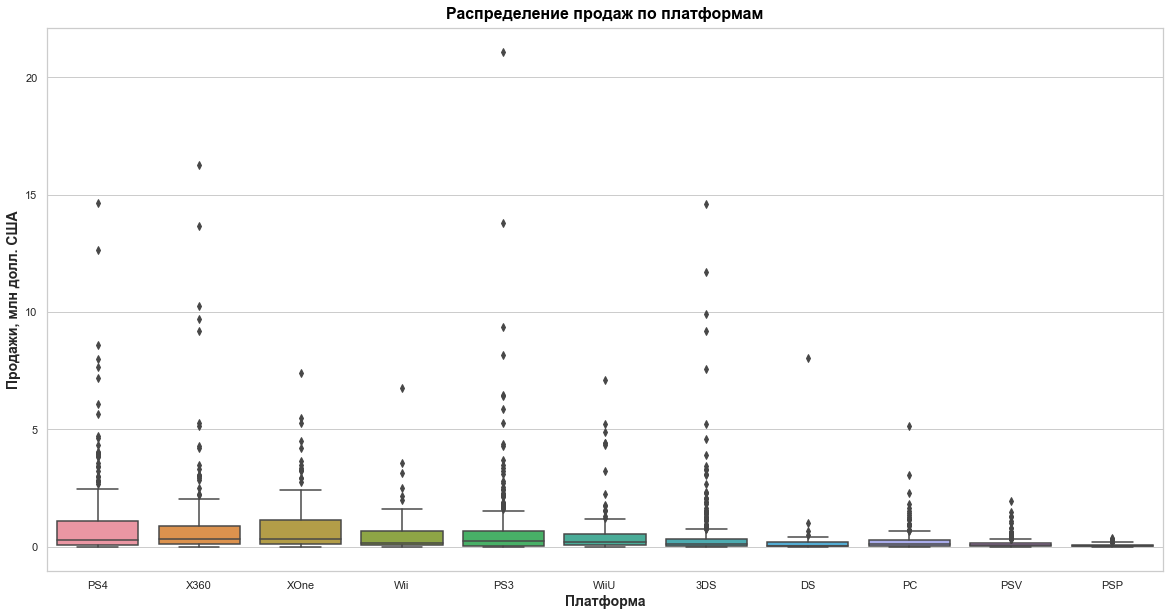

In [33]:
# Распределение продаж по платформам
sns.boxplot(
    data=df_actual,
    x='platform',
    # порядок по убыванию медианной продажи по платформе
    order = df_actual.groupby(by=["platform"])["total_sales"].mean().sort_values(ascending=False).index,
    y='total_sales',
)
plt.title('Распределение продаж по платформам', **title_font)
plt.xlabel('Платформа', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)

plt.show()

В распределениях продаж много выбросов. Распределения нужно построить без учета выбросов и анализировать медианные продажи по игре.

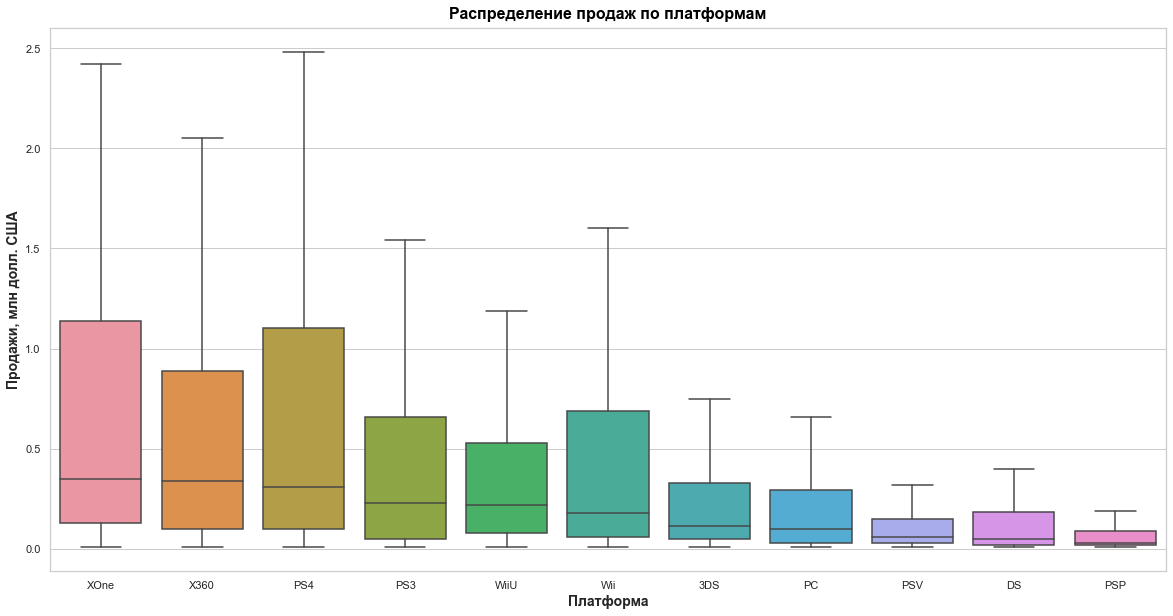

In [34]:
# Распределение продаж по платформам
sns.boxplot(
    data=df_actual,
    x='platform',
    # порядок по убыванию медианной продажи по платформе
    order = df_actual.groupby(by=["platform"])["total_sales"].median().sort_values(ascending=False).index,
    y='total_sales',
    # строим график без выбросов
    showfliers=False,
)
plt.title('Распределение продаж по платформам', **title_font)
plt.xlabel('Платформа', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)

plt.show()

- Медианные продажи игр для топ-3 платформ: XOne, X360 и PS4 — около 0,4 млн долл. США.
- Интересно, что верхняя граница IQR продаж игр для платформ последнего поколения XOne и PS4 больще 1 млн долл. США. Разработчики тратят больше средств, поэтому игры стали популярнее, но дороже.
- Средняя продажа игры на PC в 2 раза меньше, чем у консолей последнего поколения.

In [35]:
# выборка платформ, актуальных с 2012 г.
platform_actual = df_actual['platform'].unique()

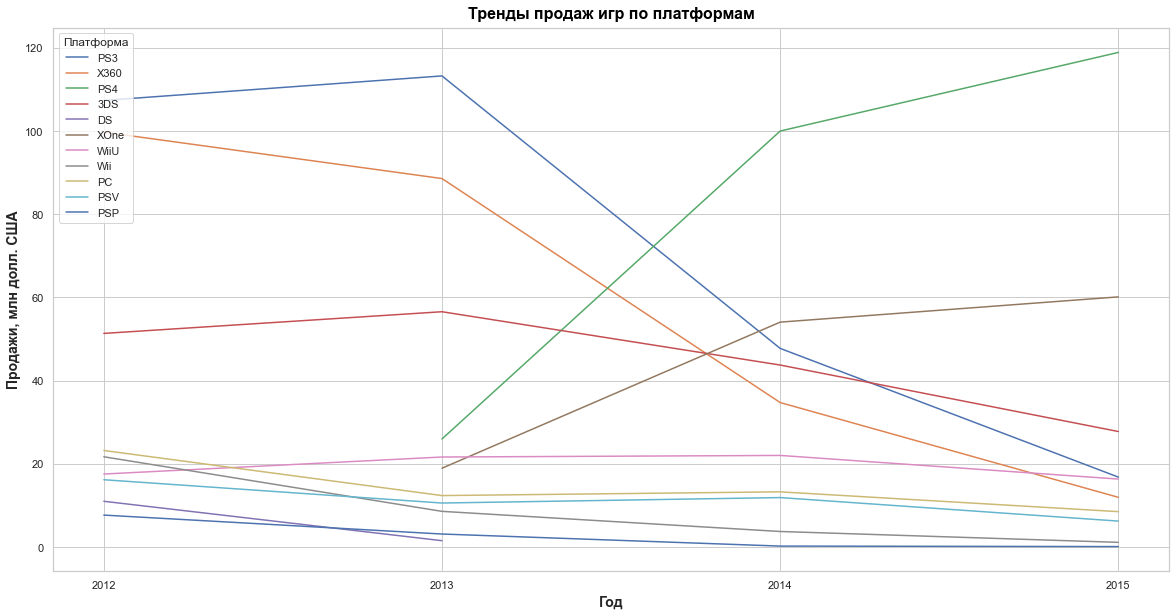

In [36]:
# построение трендов продаж на платформах с 2012 года
for platform in platform_actual:
    (df_actual.query('platform == @platform').
     groupby(by='year_of_release')['total_sales'].sum().
     plot(label=(platform))
    )
plt.title('Тренды продаж игр по платформам', **title_font)
plt.legend(title='Платформа', loc='upper left')
plt.xlabel('Год', **axis_font)
plt.ylabel('Продажи, млн долл. США', **axis_font)
plt.locator_params(integer=True)
plt.show()

- Основные лидеры продаж и роста — это платформы __PS4__: <a href="https://en.wikipedia.org/wiki/PlayStation_4">PlayStation 4</a> от Sony и __XOne__: <a href="https://en.wikipedia.org/wiki/Xbox_One">Xbox One</a> от Microsoft.   
Обе платформы представлены в 2013 году и не прошли пика десятилетнего цикла активных продаж.
- Компактная игровая консоль __3DS__ занимает 3 место по продажам, но этот показатель снижается.
- Остальные платформы показывают спад продаж. На них не стоит ориентироваться для планирования рекламной кампании на 2017 год.   

__Для планирования рекламной кампании на 2017 год нужно сфокусироваться на платформах PS4 и XOne.__

### Влияние отзывов на продажи

In [37]:
colors = ('cyan',
          'magenta',
          'yellow',
          'red',
          'blue',
          'green'
         )

In [38]:
# столбцы для автоматической проверки
columns_to_check = (('critic_score','Отзывы критиков'),
                    ('user_score','Отзывы пользователей'))

In [39]:
# словарь топ-платформ для планирования рекламной кампании
top_platforms_2012 = ('PS4', 'XOne')

TypeError: float() argument must be a string or a number, not 'NAType'

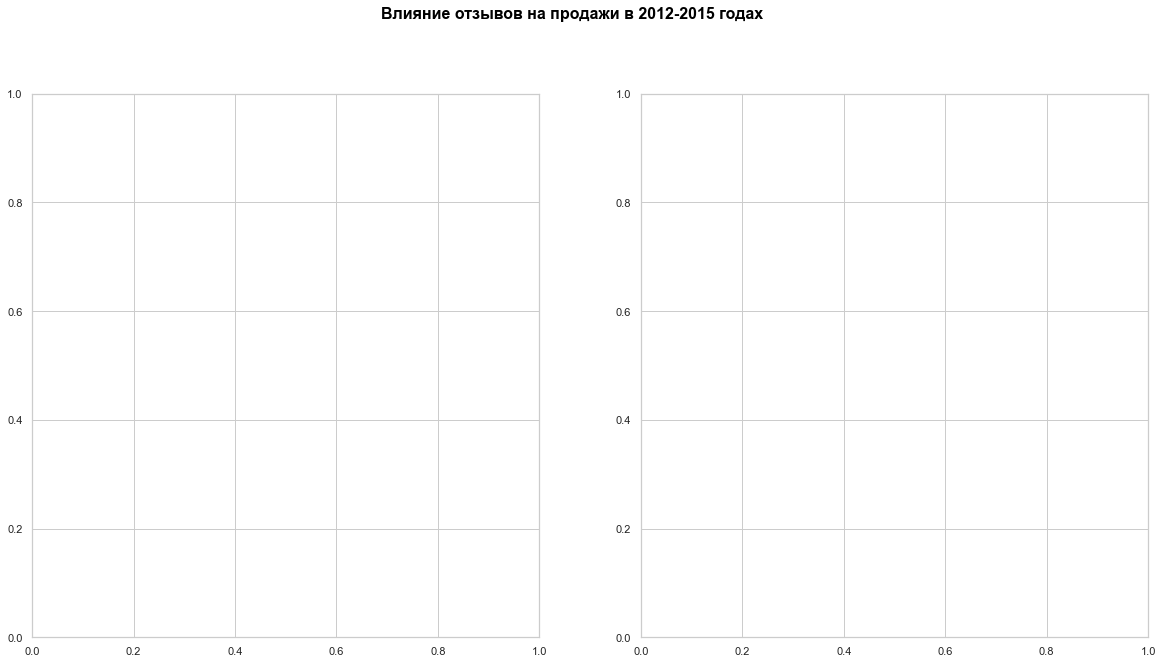

In [40]:
# объявление структуры рисунка
fig, axes = plt.subplots(ncols=len(columns_to_check))
fig.suptitle('Влияние отзывов на продажи в 2012-2015 годах', **title_font)  

for i, column in enumerate(columns_to_check): 
    ax=axes[i]
    for j, platform in enumerate(top_platforms_2012):
        temp = df_actual.query('platform == @platform')        
        corr = round(temp[column[0]].astype(float).corr(temp['total_sales'].astype(float)), 2)
        label = '{} / {}'.format(platform, corr)
        temp.plot(
            x=column[0], 
            y='total_sales',
            kind='scatter',
            label = label,
            color = colors[j],
            alpha = 0.5,
            ax=ax
        )
    ax.set_xlabel('Шкала оценки', **axis_font)
    ax.set_ylabel('Продажи, млн долл. США', **axis_font)   
    ax.set_title(column[1], **axis_font)  
    ax.legend(title='Платформа / Корреляция', loc='upper left')
plt.show()

- Отзывы пользователей слабо влияют на продажи игр — корреляция около 0.
- Отзывы критиков средне влияют на продажи игр — корреляция 0,45.

TypeError: float() argument must be a string or a number, not 'NAType'

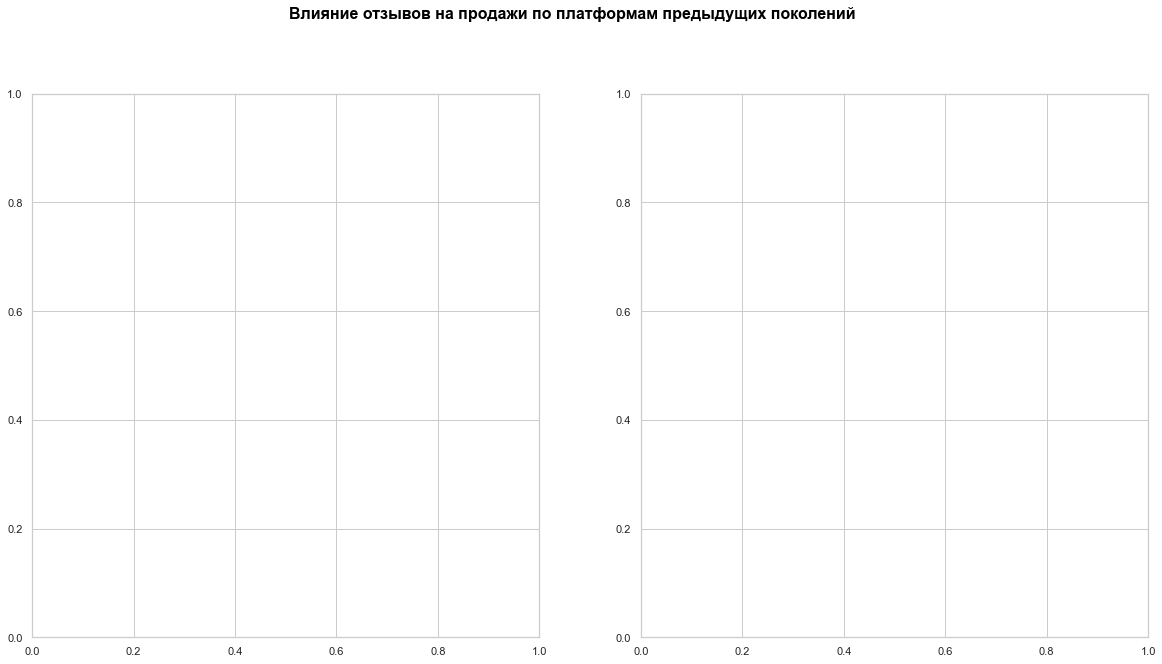

In [41]:
# объявление структуры рисунка
fig, axes = plt.subplots(ncols=len(columns_to_check))
fig.suptitle('Влияние отзывов на продажи по платформам предыдущих поколений', **title_font)  

for i, column in enumerate(columns_to_check): 
    ax=axes[i]
    for j, platform in enumerate(top_platforms):
        temp = df.query('platform == @platform')        
        corr = round(temp[column[0]].astype(float).corr(temp['total_sales'].astype(float)), 2)
        label = '{} / {}'.format(platform, corr)
        temp.plot(
            x=column[0], 
            y='total_sales',
            kind='scatter',
            label = label,
            color = colors[j],
            alpha = 0.5,
            ax=ax
        )
    ax.set_xlabel('Шкала оценки', **axis_font)
    ax.set_ylabel('Продажи, млн долл. США', **axis_font)   
    ax.set_title(column[1], **axis_font)  
    ax.legend(title='Платформа / Корреляция', loc='upper left')
plt.show()

- Отзывы пользователей слабо влияют на продажи игр — корреляция около 0,1-0,3.
- Отзывы критиков средне влияют на продажи игр — корреляция 0,1 (для PS 0,3).

__Для планирования рекламной кампании на 2017 год нужно учитывать для всех платформ:__
- __отзывы критиков средне влияют на продажи,__
- __отзывы пользователей почти не влияют на продажи.__

### Распределение игр по жанрам

In [42]:
# свод информации для построения графиков
df_genre = df_actual.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc={'count','sum'}
).reset_index().sort_values(by=['sum'], ascending=False)

df_genre['spec'] = df_genre['sum'] / df_genre['count']

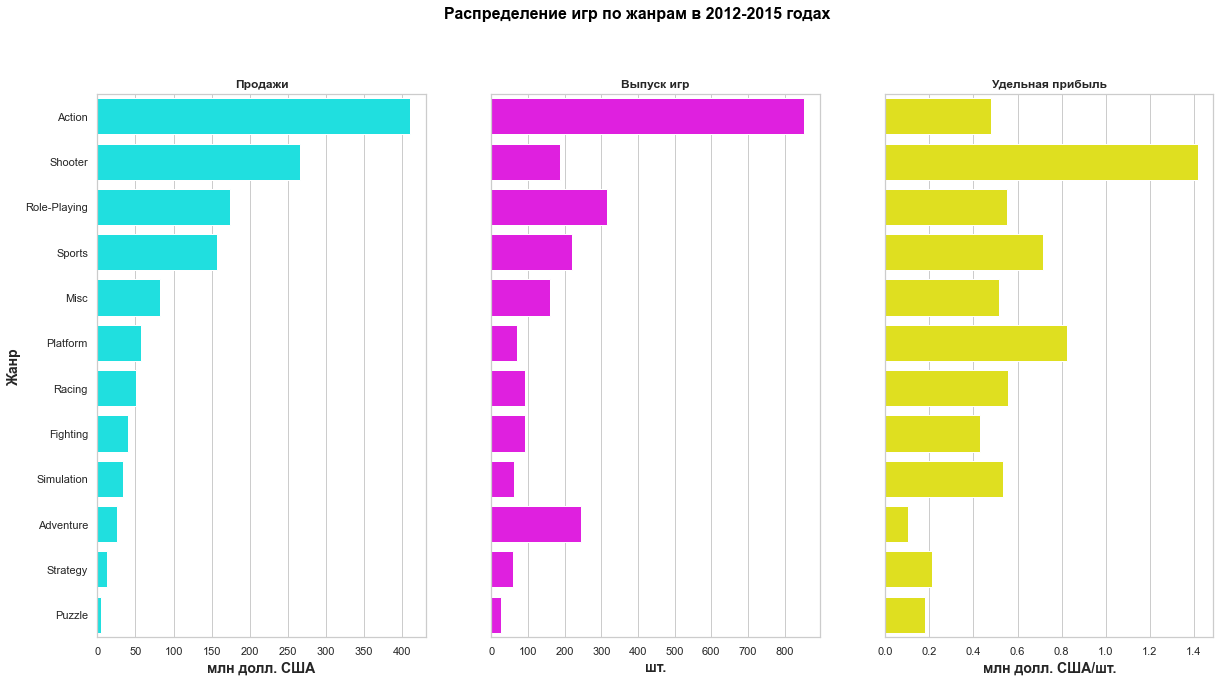

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3
)
fig.suptitle('Распределение игр по жанрам в 2012-2015 годах', **title_font)

g1 = sns.barplot(
    x='sum',
    y='genre',
    data=df_genre,
    ax=ax1,
    color=colors[0]
)

g2 = sns.barplot(
    x='count',
    y='genre',
    data=df_genre,
    ax=ax2,
    color=colors[1]
)

g3 = sns.barplot(
    x='spec',
    y='genre',
    data=df_genre,
    ax=ax3,
    color=colors[2]
)

g1.set_title('Продажи', weight='bold')
g2.set_title('Выпуск игр', weight='bold')
g3.set_title('Удельная прибыль', weight='bold')
g1.set_xlabel('млн долл. США', **axis_font)
g2.set_xlabel('шт.', **axis_font)
g3.set_xlabel('млн долл. США/шт.', **axis_font)
g1.set_ylabel('Жанр', **axis_font)
g2.set_ylabel('')
g3.set_ylabel('')
g2.set_yticklabels([])
g3.set_yticklabels([])
plt.show()

- Топ-3 наиболее продаваемых жанров в 2012-2015 годах: Action, Shooter и Role-Playing.
- Удельная прибыль игр в жанре Shooter одна из самых высоких. Игры в жанре Adventure наоборот имеют одну из самых низких удельных прибылей.

### Промежуточный вывод
Для планирования рекламной кампании на 2017 год нужно:
- Анализировать продажи __с 2012 года__. Продажи до 2012 года приходятся на пик популярности игровых консолей предыдущих поколений.
- Учитывать средний срок активных продаж на игровой платформе — __10 лет__.
- Сфокусироваться на платформах __PlayStation 4__ и __Xbox One__. От остальных платформ мало продаж — они либо морально устарели, либо слишком нишевые.
- Учитывать среднее влияние отзывов критиков на продажи. Отзывы пользователей почти не влияют на продажи на перспективных платформах.
- Сфокусироваться на жанре __Shooter__. Это самый популярный жанр и у него самая высокая средняя удельная прибыль. Жанры Action и Role-Playing также популярны, но у них обычные показатели средней удельной прибыли. Жанры Platform и Sports менее популярны, но у них высокая средняя удельная прибыль.

## Составление портрета пользователя

In [44]:
# создание словаря суммарных продаж по регионам
total_sales = {'na_sales': df_actual['na_sales'].sum(),
               'eu_sales':df_actual['eu_sales'].sum(),
               'jp_sales':df_actual['jp_sales'].sum(),
               'other_sales':df_actual['other_sales'].sum()
              }

In [45]:
# создание словаря регионов
regions = [['na_sales','NA','North America','Северная Америка'],
           ['eu_sales','EU','Europe','Европа'],
           ['jp_sales','JP','Japan','Япония'],
           ['other_sales','RoW','The rest of the world ','Остальные страны']
          ]

In [46]:
# импорт библиотеки интерполятора величин
from scipy.interpolate import interp1d
# ввод интерполятора для пропорционального отображения радиуса pie chart
m = interp1d([0,1],[0.5,1])

### Популярность игровых платформ по регионам

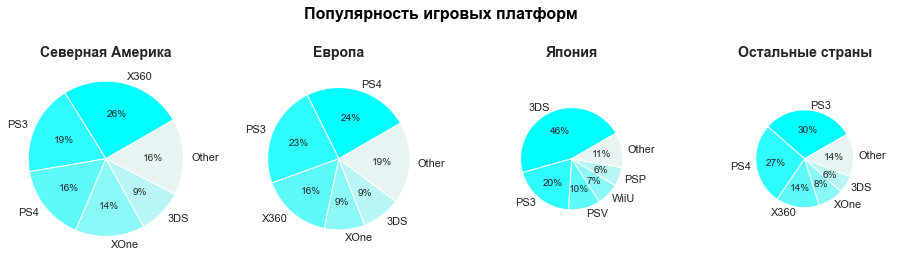

In [47]:
# объявление структуры рисунка
fig, axes = plt.subplots(1, 
                         len(regions), 
                         figsize=(16, 4)
                        )

for i, region in enumerate(regions):
    # номер диаграмы на рисунке
    ax = axes[i]
    # расчет данных для топ-5 параметра
    x = df_actual.groupby(by='platform')[region[0]].sum().sort_values(ascending=False).head(5)
    # расчет данных для позиций вне топ-5 параметра
    other = pd.Series({'Other': total_sales[region[0]]-x.sum()})
    # объединение в одну структуру
    x = x.append(other)
    # формирование радиусов графиков
    rad = m(total_sales[region[0]] / max(total_sales.values()))
    # построение графиков на рисунке
    ax.pie(x,
           labels = x.index,
           autopct = '%1.0f%%',
#           pctdistance = 1.3,          
           radius = rad,
           colors=sns.light_palette(colors[0], reverse=True),
           startangle=30)
    ax.set_title(region[3],**axis_font)


plt.suptitle('Популярность игровых платформ', **title_font)
plt.show()

- В Северной Америке и Европе одинаковый набор популярных платформ: X360, PS3, PS4, XOne и 3DS, но разные доли.  
В Северной Америке наиболее популярна X360 (продукт Microsoft на родине Microsoft) и PS3, а в Европе более новая PS4 от Sony. 
- В Японии очень популярны ручные консоли.  
Лидер — 3DS от Nintendo, второе место за PS3 и остальные — снова ручные консоли PSV, WiiU и PSP.
- В остальном мире наиболее популярны PS3, PS4 и X360.

### Популярность жанров по регионам

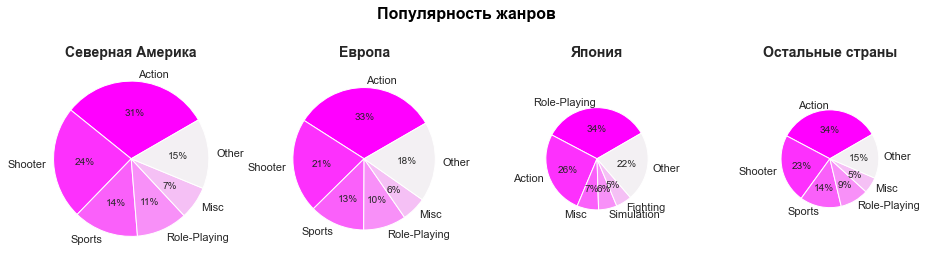

In [48]:
# объявление структуры рисунка
fig, axes = plt.subplots(1, len(regions), figsize=(16, 4))

for i, region in enumerate(regions):
    # номер диаграмы на рисунке
    ax = axes[i]
    # расчет данных для топ-5 параметра
    x = df_actual.groupby(by='genre')[region[0]].sum().sort_values(ascending=False).head(5)
    # расчет данных для позиций вне топ-5 параметра
    other = pd.Series({'Other': total_sales[region[0]]-x.sum()})
    # объединение в одну структуру
    x = x.append(other)
    # формирование радиусов графиков
    rad = m(total_sales[region[0]] / max(total_sales.values()))
    # построение графиков на рисунке
    ax.pie(x,
           labels = x.index,
           autopct = '%1.0f%%',
#           pctdistance = 1.3,          
           radius = rad,
           colors=sns.light_palette(colors[1], reverse=True),
           startangle=30)
    ax.set_title(region[3],**axis_font)


plt.suptitle('Популярность жанров', **title_font)

plt.show()

- Везде, кроме Японии, одинаковый набор и распределение популярных жанров: Action, Shooter, Sports, Role-Playing и Misc. 
- В Японии наиболее популярны игры Role-Playing, Action, Misc, Simulation, Fighting.

### Влияние рейтинга на продажи по регионам

In [49]:
# словарь рейтингов ESRB
esrb_dict = {
    'E': 'Everyone',
    'T': 'Teen',
    'M': 'Mature',
    'E10+': 'Everyone 10 \n and older',
    'EC': 'Early childhood',
    'K-A': 'Kids to Adults',
    'RP': 'Rating Pending',
    'AO': 'Adults Only 18+'
}

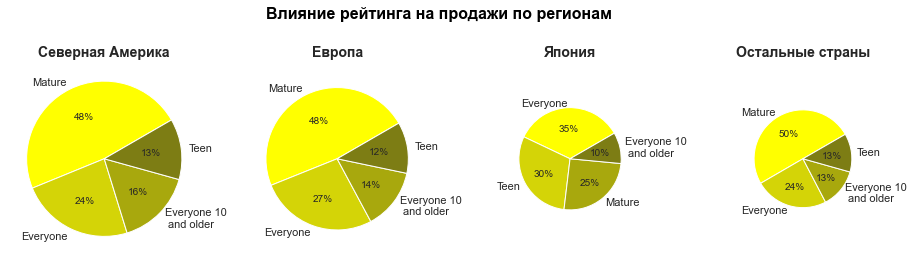

In [50]:
# объявление структуры рисунка
fig, axes = plt.subplots(1, len(regions), figsize=(16, 4))

for i, region in enumerate(regions):
    # номер диаграмы на рисунке
    ax = axes[i]
    # расчет данных для топ-5 параметра
    temp = df_actual.groupby(by='rating')[region[0]].sum().sort_values(ascending=False)
    # формирование радиусов графиков
    rad = m(total_sales[region[0]] / max(total_sales.values()))
    # построение графиков на рисунке

    ax.pie(temp,
           labels = [esrb_dict[x] for x in temp.index],
           autopct = '%1.0f%%',
#           pctdistance = 1.3,          
           radius = rad,
           colors=sns.dark_palette(colors[2], reverse=True),
           startangle=30)
    ax.set_title(region[3],**axis_font)

plt.suptitle('Влияние рейтинга на продажи по регионам', **title_font)
plt.show()

- Везде, кроме Японии, наиболее популярны игры для лиц старше 17 лет (__Mature__). На втором и третьем месте игры __для всех возрастов__ и __10+__.
- В Японии наиболее высокие продажи у игр для всех возрастов (__Everyone__). Затем идут игры для подростков __13+__. Игры для взрослых на третьем месте по популярности.

### Промежуточный вывод
- В Северной Америке наиболее популярна консоль X360 от Microsoft. В целом на Западе борятся Microsoft и Sony. В Японии Microsoft не особо продается, так как рынок занят традиционными игроками Nintendo и Sony.
- На Западе предпочитают игры активные игры: __Action__, __Shooter__ и __Sports__. В Японии из-за культурных отличий наиболее популярны ролевые игры. __Action__ на втором месте и игры смешанного жанра на третьем.
- __Рейтинг ESRB влияет на продажи в регионах.__   
На Западе предпочитают игры __17+__. В Японии наибольшие продажи у игр для всех возрастов и __13+__.

## Проверка гипотез
<a id = "main_hypotheses"></a>
[В оглавление](#index)

Критический уровень статистической значимости — 3 %.  
Высокий порог статистической значимости задан с учетом важности и стоимости задачи.

In [51]:
# пороговое значение alpha
alpha = 0.03

### Средние пользовательские рейтинги платформ Xbox One и PC

Формулировка согласно заданию:  
> Проверьте гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
___
Так как в задании предлагается сравнить средние значения двух выборок, то необходимо формулировать и проверять гипотезу о равенстве средних двух генеральных совокупностей.

__Нулевая гипотеза:__ средние пользовательские рейтинги платформ Xbox One и PC равны.  
__Альтернативная гипотеза:__ средние пользовательские рейтинги платформ Xbox One и PC отличаются.  

In [52]:
results = st.ttest_ind(
    df_actual.query('platform == "XOne" and user_score.notna()')['user_score'], 
    df_actual.query('platform == "PC" and user_score.notna()')['user_score'], 
    equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

TypeError: unhashable type: 'numpy.ndarray'

In [53]:
# проверка выводов
df_actual.query('platform == "XOne" or platform == "PC"').pivot_table(
    index=['platform'],
    values=['user_score'],
    aggfunc='mean'
)

,user_score
platform,
PC,6.5
XOne,6.5


### Средние пользовательские рейтинги жанров Action и Sports

Формулировка согласно заданию:  
> Проверьте гипотезы:  
Средние пользовательские рейтинги жанров Action и Sports разные
___
Так как в задании предлагается сравнить средние значения двух выборок, то необходимо формулировать и проверять гипотезу о равенстве средних двух генеральных совокупностей.

__Нулевая гипотеза:__ средние пользовательские рейтинги жанров Action и Sports равны.  
__Альтернативная гипотеза:__ средние пользовательские рейтинги жанров Action и Sports разные.  

In [ ]:
results = st.ttest_ind(
    df_actual.query('genre == "Action" and user_score.notna()')['user_score'], 
    df_actual.query('genre == "Sports" and user_score.notna()')['user_score'], 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

In [ ]:
# проверка выводов
df_actual.query('genre == "Action" or genre == "Sports"').pivot_table(
    index=['genre'],
    values=['user_score'],
    aggfunc='mean'
)

### Промежуточный вывод
- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны — __верна__ с вероятностью почти 94 %.
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны — __не верна__. Верна альтернативная гипотеза — средние пользовательские рейтинги жанров Action и Sports разные с вероятностью почти 100 %.

## Выводы и рекомендации
<a id = "conclusion"></a>
[В оглавление](#index)

__Выявленные закономерности для планирования рекламной кампании:__
- Выручку прогнозировать по данным после спада продаж в 2012 году.
- Средний период активных продаж на игровой платформе — 10 лет.
- Суммарные продажи на платформе __PS4__ почти в 2 раза больше, чем у прямого конкурента __XOne__.
- Медианные продажи на платформах __PS4__ и __XOne__ почти равны. У __PC__ в 2 раза меньше, чем у консолей последнего поколения.
- Оценки критиков влияют средне на продажи. Оценки пользователи почти не влияют.
- Топ-3 наиболее продаваемых жанров в 2012-2015 годах: Action, Shooter и Role-Playing. Удельная прибыль игр в жанре Shooter одна из самых высоких.
___
__Критерии успешности игры для планирования рекламной кампании:__
- Платформа:
    - Северная Америка и Европа — __PS4__ или __XOne__.
    - Япония — __3DS__.
- Жанр:
    - Северная Америка и Европа — __Action__ или __Shooter__.
    - Япония — __Role-Playing__.
- Рейтинг ESRB:
    - Северная Америка и Европа — __M__ от 17 лет.
    - Япония — __E__ для всех возрастов.